In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
os.chdir("C:\\Users\\Seijsener\\Downloads")

In [4]:
df = pd.read_csv("learningSet.csv")

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_496\3745723400.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("learningSet.csv")


In [5]:
df

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [7]:
numerical_columns = df.select_dtypes(include='number')

In [8]:
numerical_null_counts = numerical_columns.isnull().sum()

In [11]:
print("null values in numerical columns")
print(numerical_null_counts[numerical_null_counts > 0])

null values in numerical columns
AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
            ...  
RAMNT_23    87553
RAMNT_24    77674
NEXTDATE     9973
TIMELAG      9973
CLUSTER2      132
Length: 91, dtype: int64


In [14]:
columns_to_check = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']
null_counts = df[columns_to_check].isnull().sum()
print("null values in specific columns")
print(null_counts)

null values in specific columns
GEOCODE2      132
WEALTH1     44732
ADI           132
DMA           132
MSA           132
dtype: int64


In [15]:
print("Unique values in GEOCODE2:", df['GEOCODE2'].unique())
print("Unique values in WEALTH1:", df['WEALTH1'].unique())
print("Unique values in ADI:", df['ADI'].unique())
print("Unique values in DMA:", df['DMA'].unique())
print("Unique values in MSA:", df['MSA'].unique())

Unique values in GEOCODE2: ['C' 'A' 'D' 'B' ' ' nan]
Unique values in WEALTH1: [nan  9.  1.  4.  2.  6.  0.  5.  8.  3.  7.]
Unique values in ADI: [177.  13. 281.  67. 127. 185.  91. 251. 391. 181. 269.  83. 107. 249.
 291.  57. 227. 329. 351.  55. 133.  51.  73. 159. 201.  75. 233. 591.
 203. 175.  59. 105. 111. 173. 415. 323. 187.  65. 412. 109. 425. 405.
 197. 279. 645. 207.  89. 361. 209. 213.  15.  21. 113. 131. 469. 199.
 129. 441. 459. 235. 301.  39. 429. 285. 245. 335. 393. 577. 439. 455.
 383. 263.   0. 427. 307. 275. 119. 229. 273. 325. 371. 377. 315. 342.
 421. 219.  61.  93. 375. 283. 381. 243. 353. 613. 339. 367. 417. 299.
 271. 157.  77. 327.  53.  87. 451. 627.  71. 253. 363. 403. 115. 389.
  63. 321. 448. 237. 217. 241. 123. 221. 165. 277.  85. 319. 247.  69.
 379.  95.  17. 625. 462. 303. 179. 331. 231. 337. 257. 409. 457. 359.
 373.  nan 413. 215. 205. 313. 211. 305. 355. 419. 473. 423. 121. 433.
 431. 465. 445.  19. 467. 255. 437. 117. 449. 195. 435. 621. 295.  11.
 

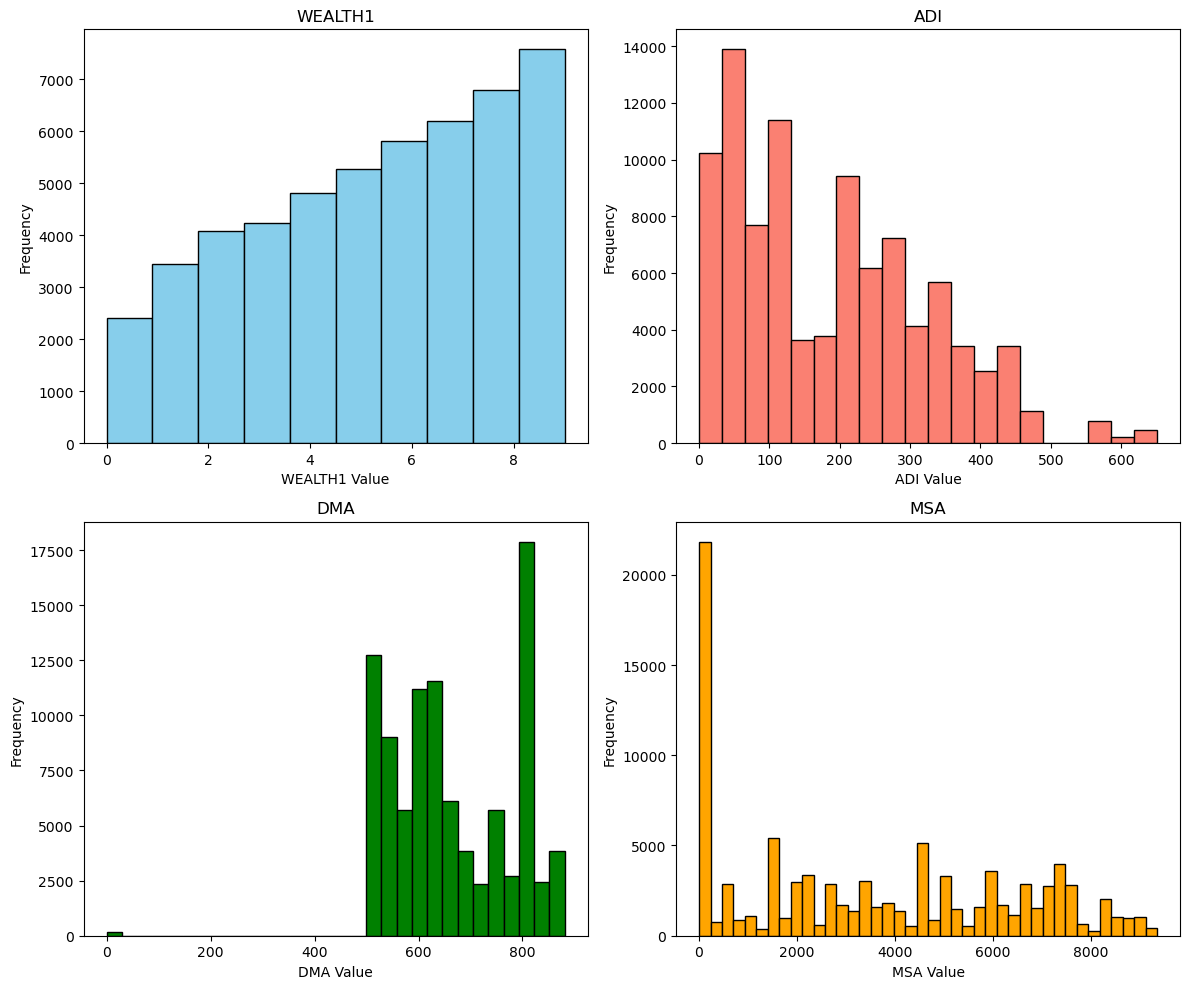

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(df['WEALTH1'].dropna(), bins=10, color='skyblue', edgecolor='black')
axs[0, 0].set_title('WEALTH1')
axs[0, 0].set_xlabel('WEALTH1 Value')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['ADI'].dropna(), bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_title('ADI')
axs[0, 1].set_xlabel('ADI Value')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(df['DMA'].dropna(), bins=30, color='green', edgecolor='black')
axs[1, 0].set_title('DMA')
axs[1, 0].set_xlabel('DMA Value')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['MSA'].dropna(), bins=40, color='orange', edgecolor='black')
axs[1, 1].set_title('MSA')
axs[1, 1].set_xlabel('MSA Value')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [19]:
correlations = df[['WEALTH1', 'ADI', 'DMA', 'MSA', 'TARGET_B']].corr()
print(correlations)

           WEALTH1       ADI       DMA       MSA  TARGET_B
WEALTH1   1.000000 -0.093270 -0.049469  0.141149  0.011249
ADI      -0.093270  1.000000 -0.094321 -0.200883 -0.008464
DMA      -0.049469 -0.094321  1.000000  0.308739  0.022425
MSA       0.141149 -0.200883  0.308739  1.000000  0.011025
TARGET_B  0.011249 -0.008464  0.022425  0.011025  1.000000


Based on the correlation coefficients:

WEALTH1 has a very weak positive correlation with TARGET_B.
ADI and MSA have very weak negative correlations with TARGET_B.
DMA has a very weak positive correlation with TARGET_B.
Overall, the correlations are quite weak, indicating that these variables might not be strongly predictive of the target variable TARGET_B.

In [20]:
print("Summary statistics for WEALTH1:", df['WEALTH1'].describe())
print("Summary statistics for ADI:", df['ADI'].describe())
print("Summary statistics for DMA:", df['DMA'].describe())
print("Summary statistics for MSA:", df['MSA'].describe())
print("Summary statistics for GEOCODE2:", df['GEOCODE2'].describe())

Summary statistics for WEALTH1: count    50680.000000
mean         5.345699
std          2.742490
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max          9.000000
Name: WEALTH1, dtype: float64
Summary statistics for ADI: count    95280.000000
mean       187.356402
std        137.019184
min          0.000000
25%         65.000000
50%        175.000000
75%        279.000000
max        651.000000
Name: ADI, dtype: float64
Summary statistics for DMA: count    95280.000000
mean       664.004072
std        116.363600
min          0.000000
25%        561.000000
50%        635.000000
75%        801.000000
max        881.000000
Name: DMA, dtype: float64
Summary statistics for MSA: count    95280.000000
mean      3527.744102
std       2863.904737
min          0.000000
25%        520.000000
50%       3350.000000
75%       5960.000000
max       9360.000000
Name: MSA, dtype: float64
Summary statistics for GEOCODE2: count     95280
unique        5
top    

For columns like WEALTH1, ADI, DMA, and MSA, we can consider imputing missing values using methods like mean, median, or mode imputation, depending on the distribution of the data.

WEALTH1: Since this is a numerical column, we can impute missing values with the median, as it's less sensitive to outliers compared to the mean.

ADI, DMA, and MSA: These are also numerical columns. We can similarly impute missing values with the median for each respective column.

In [24]:
wealth1_median = df['WEALTH1'].median()
df['WEALTH1'] = df['WEALTH1'].fillna(wealth1_median)

adi_median = df['ADI'].median()
df['ADI'] = df['ADI'].fillna(adi_median)

dma_median = df['DMA'].median()
df['DMA'] = df['DMA'].fillna(dma_median)

msa_median = df['MSA'].median()
df['MSA'] = df['MSA'].fillna(msa_median)

print("Missing values after imputation:")
print(df[['WEALTH1', 'ADI', 'DMA', 'MSA']].isnull().sum())

Missing values after imputation:
WEALTH1    0
ADI        0
DMA        0
MSA        0
dtype: int64


For GEOCODE2, since it's a categorical variable, we can replace missing values with the mode (most frequent value) or consider dropping rows with missing values if the proportion of missing values is insignificant

let's replace the missing values in the GEOCODE2 column with its mode.

In [25]:
mode_geocode2 = df['GEOCODE2'].mode()[0]
df['GEOCODE2'].fillna(mode_geocode2, inplace=True)

missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values after imputation:
 ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2      0
Length: 481, dtype: int64


In [26]:
columns_to_check = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']
null_counts = df[columns_to_check].isnull().sum()
print("null values in specific columns")
print(null_counts)

null values in specific columns
GEOCODE2    0
WEALTH1     0
ADI         0
DMA         0
MSA         0
dtype: int64
